# DSA 210 Project


### Importing libraries

In [1]:
import pandas as pd
import numpy as np

### Reading files

In [6]:
df1 = pd.read_csv('annual-working-hours-per-worker.csv')
df2 = pd.read_csv('average-years-of-schooling.csv')
df3 = pd.read_csv('economic-inequality-gini-index.csv')
df4 = pd.read_csv('gdp-per-capita-worldbank.csv')
df5 = pd.read_csv('gender-development-index.csv')
df6 = pd.read_csv('human-development-index.csv')
df7 = pd.read_csv('life-expectancy-hmd-unwpp.csv')
df8 = pd.read_csv('marriage-rate-per-1000-inhabitants.csv')
df9 = pd.read_csv('share-of-population-urban.csv')
df10 = pd.read_csv('unemployment-rate.csv')

checking the core datasets Marriage Rates(df8) and Urban Population(df9)

(they are not in the first numbered dfs because the files were in alphabetical order)

In [ ]:
df8.head()

,Entity,Code,Year,"Crude marriage rate (marriages per 1,000 people)"
0,Argentina,ARG,2010,3.0
1,Argentina,ARG,2011,3.1
2,Argentina,ARG,2012,3.2
3,Argentina,ARG,2013,2.9
4,Argentina,ARG,2014,2.8


In [ ]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427 entries, 0 to 2426
Data columns (total 4 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Entity                                            2427 non-null   object 
 1   Code                                              2427 non-null   object 
 2   Year                                              2427 non-null   int64  
 3   Crude marriage rate (marriages per 1,000 people)  2427 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 76.0+ KB


In [ ]:
df8.describe()

,Year,"Crude marriage rate (marriages per 1,000 people)"
count,2427.000000,2427.000000
mean,1989.345694,6.492995
std,20.696796,1.931159
min,1886.000000,1.600000
25%,1975.000000,5.000000
50%,1991.000000,6.300000
75%,2006.000000,7.800000
max,2020.000000,16.400000


In [ ]:
df9.head()

,Entity,Code,Year,Urban population (% of total population)
0,Afghanistan,AFG,1960,8.401
1,Afghanistan,AFG,1961,8.684
2,Afghanistan,AFG,1962,8.976
3,Afghanistan,AFG,1963,9.276
4,Afghanistan,AFG,1964,9.586


In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14656 entries, 0 to 14655
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    14656 non-null  object 
 1   Code                                      13760 non-null  object 
 2   Year                                      14656 non-null  int64  
 3   Urban population (% of total population)  14656 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 458.1+ KB


In [ ]:
df9.describe()

,Year,Urban population (% of total population)
count,14656.000000,14656.000000
mean,1991.500000,51.584218
std,18.473583,25.431085
min,1960.000000,2.077000
25%,1975.750000,30.682750
50%,1991.500000,50.753000
75%,2007.250000,72.020000
max,2023.000000,100.000000


After analyzing the data I decided to use these countries which didn't have any major missing data in the datasets. The other countries had a lot of missing data especially in the marriage rates dataset that is crucial for the project.

In [7]:
countries_to_keep = [
    "Argentina", "Australia", "Austria", "Belgium", "Bulgaria",
     "Chile", "Costa Rica", "Croatia", "Cyprus", "Czechia", "Denmark",
    "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland",
    "Israel", "Italy", "Japan", "Latvia", "Lithuania", "Luxembourg", "Malta", "Mexico",
    "Netherlands", "New Zealand", "Norway", "Poland", "Portugal", "Romania",
    "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden", "Switzerland",
    "Turkey", "United Kingdom", "United States"
]

### Filtering files

The most recent year for the dataset Annual Working Hours was 2017 so the years between 2010-2017 were picked.

In [8]:
df1_cleaned = df1[(df1['Year'] > 2009) & (df1['Year'] < 2018)]
df2_cleaned = df2[(df2['Year'] > 2009) & (df2['Year'] < 2018)]
df3_cleaned = df3[(df3['Year'] > 2009) & (df3['Year'] < 2018)]
df4_cleaned = df4[(df4['Year'] > 2009) & (df4['Year'] < 2018)]
df5_cleaned = df5[(df5['Year'] > 2009) & (df5['Year'] < 2018)]
df6_cleaned = df6[(df6['Year'] > 2009) & (df6['Year'] < 2018)]
df7_cleaned = df7[(df7['Year'] > 2009) & (df7['Year'] < 2018)]
df8_cleaned = df8[(df8['Year'] > 2009) & (df8['Year'] < 2018)]
df9_cleaned = df9[(df9['Year'] > 2009) & (df9['Year'] < 2018)]
df10_cleaned = df10[(df10['Year'] > 2009) & (df10['Year'] < 2018)]

In [9]:
df1_filtered = df1_cleaned[df1_cleaned['Entity'].isin(countries_to_keep)]
df2_filtered = df2_cleaned[df2_cleaned['Entity'].isin(countries_to_keep)]
df3_filtered = df3_cleaned[df3_cleaned['Entity'].isin(countries_to_keep)]
df4_filtered = df4_cleaned[df4_cleaned['Entity'].isin(countries_to_keep)]
df5_filtered = df5_cleaned[df5_cleaned['Entity'].isin(countries_to_keep)]
df6_filtered = df6_cleaned[df6_cleaned['Entity'].isin(countries_to_keep)]
df7_filtered = df7_cleaned[df7_cleaned['Entity'].isin(countries_to_keep)]
df8_filtered = df8_cleaned[df8_cleaned['Entity'].isin(countries_to_keep)]
df9_filtered = df9_cleaned[df9_cleaned['Entity'].isin(countries_to_keep)]
df10_filtered = df10_cleaned[df10_cleaned['Entity'].isin(countries_to_keep)]

Also changing Argentina (urban) in the GINI Index dataset to just Argentina for the merging

In [10]:
df3['Entity'] = df3['Entity'].replace("Argentina(urban)", "Argentina")

In [12]:
df1_filtered.to_csv("filtered-annual-working-hours-per-worker.csv", index=False)
df2_filtered.to_csv("filtered-average-years-of-schooling.csv", index=False)
df3_filtered.to_csv("filtered-daily-mean-income-2011-ppp.csv", index=False)
df4_filtered.to_csv("filtered-gdp-per-capita-worldbank.csv", index=False)
df5_filtered.to_csv("filtered-gender-development-index.csv", index=False)
df6_filtered.to_csv("filtered-human-development-index.csv", index=False)
df7_filtered.to_csv("filtered-life-expectancy-hmd-unwpp.csv", index=False)
df8_filtered.to_csv("filtered-marriage-rate-per-1000-inhabitants.csv", index=False)
df9_filtered.to_csv("filtered-share-of-population-urban.csv", index=False)
df10_filtered.to_csv("filtered-unemployment-rate.csv", index=False)

### Merging files

reading the filtered files

In [13]:
df1 = pd.read_csv('filtered-annual-working-hours-per-worker.csv')
df2 = pd.read_csv('filtered-average-years-of-schooling.csv')
df3 = pd.read_csv('filtered-daily-mean-income-2011-ppp.csv')
df4 = pd.read_csv('filtered-gdp-per-capita-worldbank.csv')
df5 = pd.read_csv('filtered-gender-development-index.csv')
df6 = pd.read_csv('filtered-human-development-index.csv')
df7 = pd.read_csv('filtered-life-expectancy-hmd-unwpp.csv')
df8 = pd.read_csv('filtered-marriage-rate-per-1000-inhabitants.csv')
df9 = pd.read_csv('filtered-share-of-population-urban.csv')
df10 = pd.read_csv('filtered-unemployment-rate.csv')

error accured while merging because of the "Code" column so dropping the column because it is not needed

In [14]:
for df in [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]:
    if "Code" in df.columns:
        df.drop(columns=["Code"], inplace=True)

merging by the country and years

In [15]:
merged_df = pd.merge(df1, df2, on=["Entity", "Year"], how="outer")
merged_df = pd.merge(merged_df, df3, on=["Entity", "Year"], how="outer")
merged_df = pd.merge(merged_df, df4, on=["Entity", "Year"], how="outer")
merged_df = pd.merge(merged_df, df5, on=["Entity", "Year"], how="outer")
merged_df = pd.merge(merged_df, df6, on=["Entity", "Year"], how="outer")
merged_df = pd.merge(merged_df, df7, on=["Entity", "Year"], how="outer")
merged_df = pd.merge(merged_df, df8, on=["Entity", "Year"], how="outer")
merged_df = pd.merge(merged_df, df9, on=["Entity", "Year"], how="outer")
merged_df = pd.merge(merged_df, df10, on=["Entity", "Year"], how="outer")

In [16]:
merged_df.to_csv('merged_data.csv', index=False)

After the merging did some manual data cleaning on the merged csv file

Removed the empty"990179-annotations" column

Had to add the gini coefficient data of Argentina manually because the name changing didn't work. Also fillen in the missing 2015 data with mean imputation.

Chile's 2010, 2012, 2016 missing data was also filled in with mean imputation

Fiiled in using mean imputation on: Mexico's 2011, 2013, 2015, 2017 and South Korea's 2011, 2013, 2015 year missing datas.

Australia's missing 2015 and 2017 datas were filled using mean imputation and the missing 2011, 2012, 2013 datas were filled using the linear interpolation formula.

Also New Zealand and Japan were removed from the dataset because of insufficient data in the gini index dataset.

### Reading the final merged data that is uploaded after data handling manually

In [50]:
df = pd.read_csv('final_merged_data.csv')

## Data Visualization

### Importing libraries for visualization

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

### Creating a facet grid of urbanization trends by country

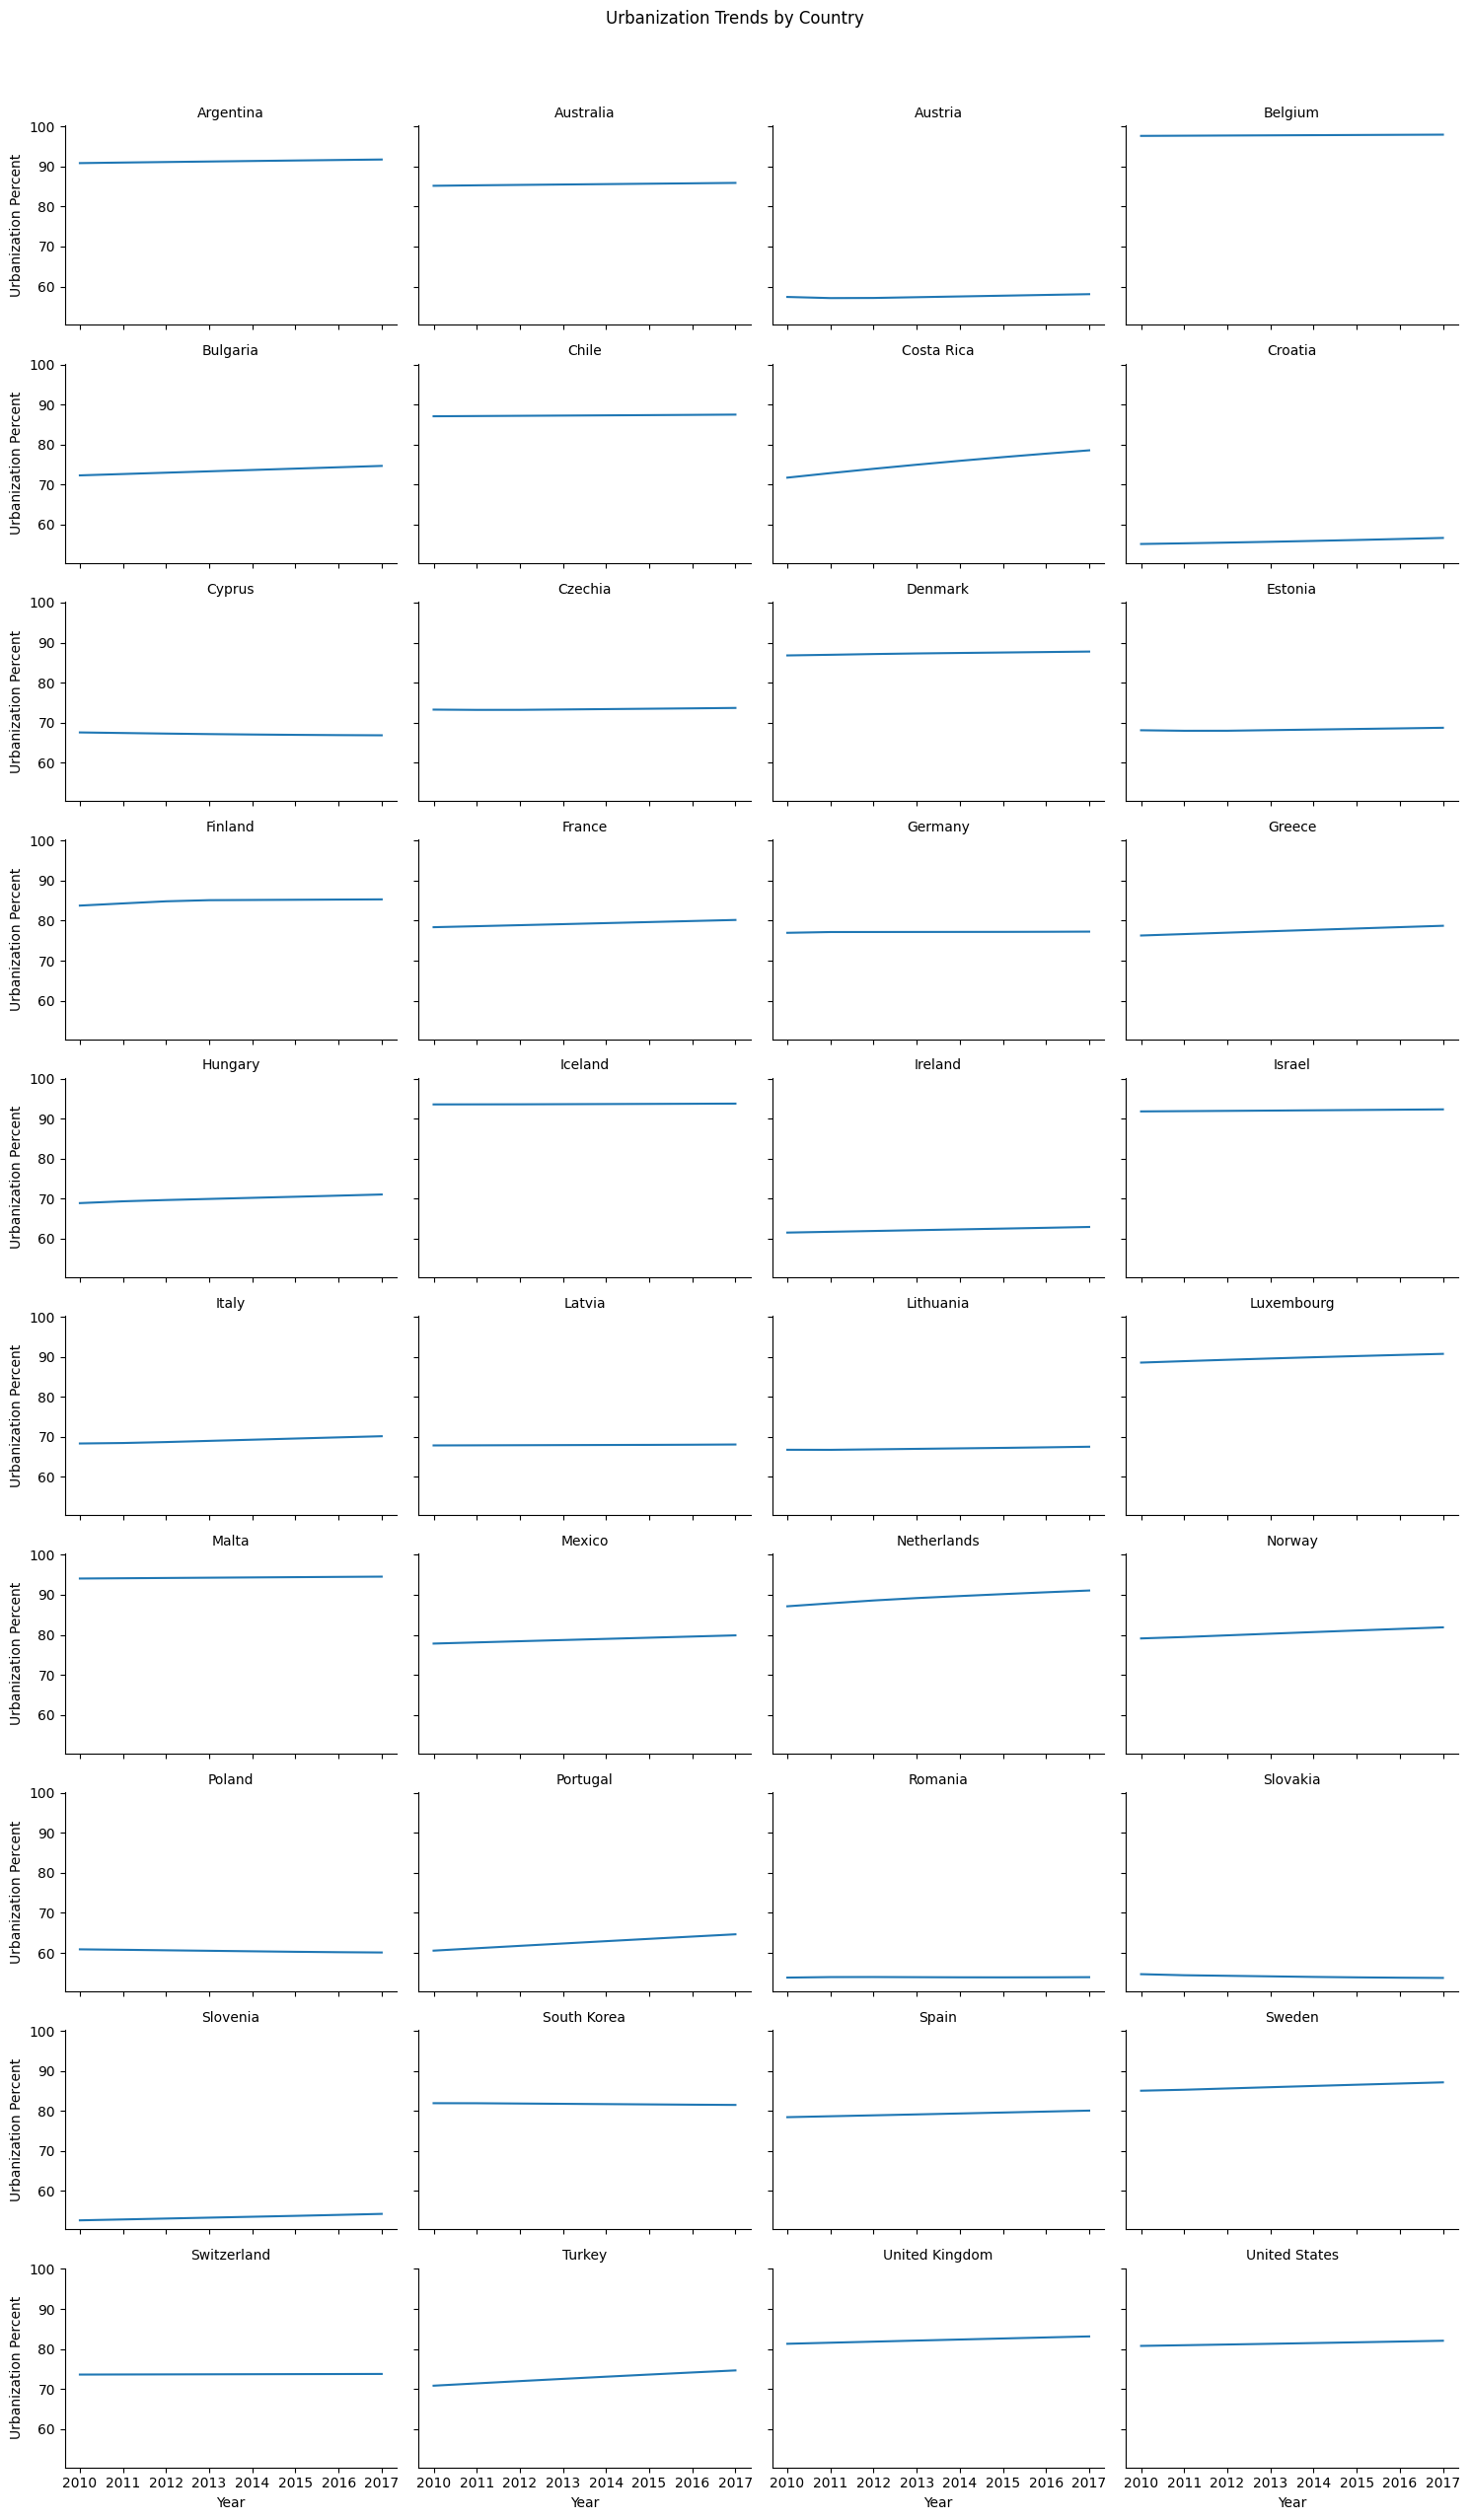

In [ ]:
g = sns.FacetGrid(df, col="Entity", col_wrap=4, height=2.5, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Year", y="Urban population (% of total population)")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Urbanization Percent")
g.fig.suptitle("Urbanization Trends by Country", y=1.02)
plt.tight_layout()
plt.show()

### Creating a facet grid of marriage rate trends by country

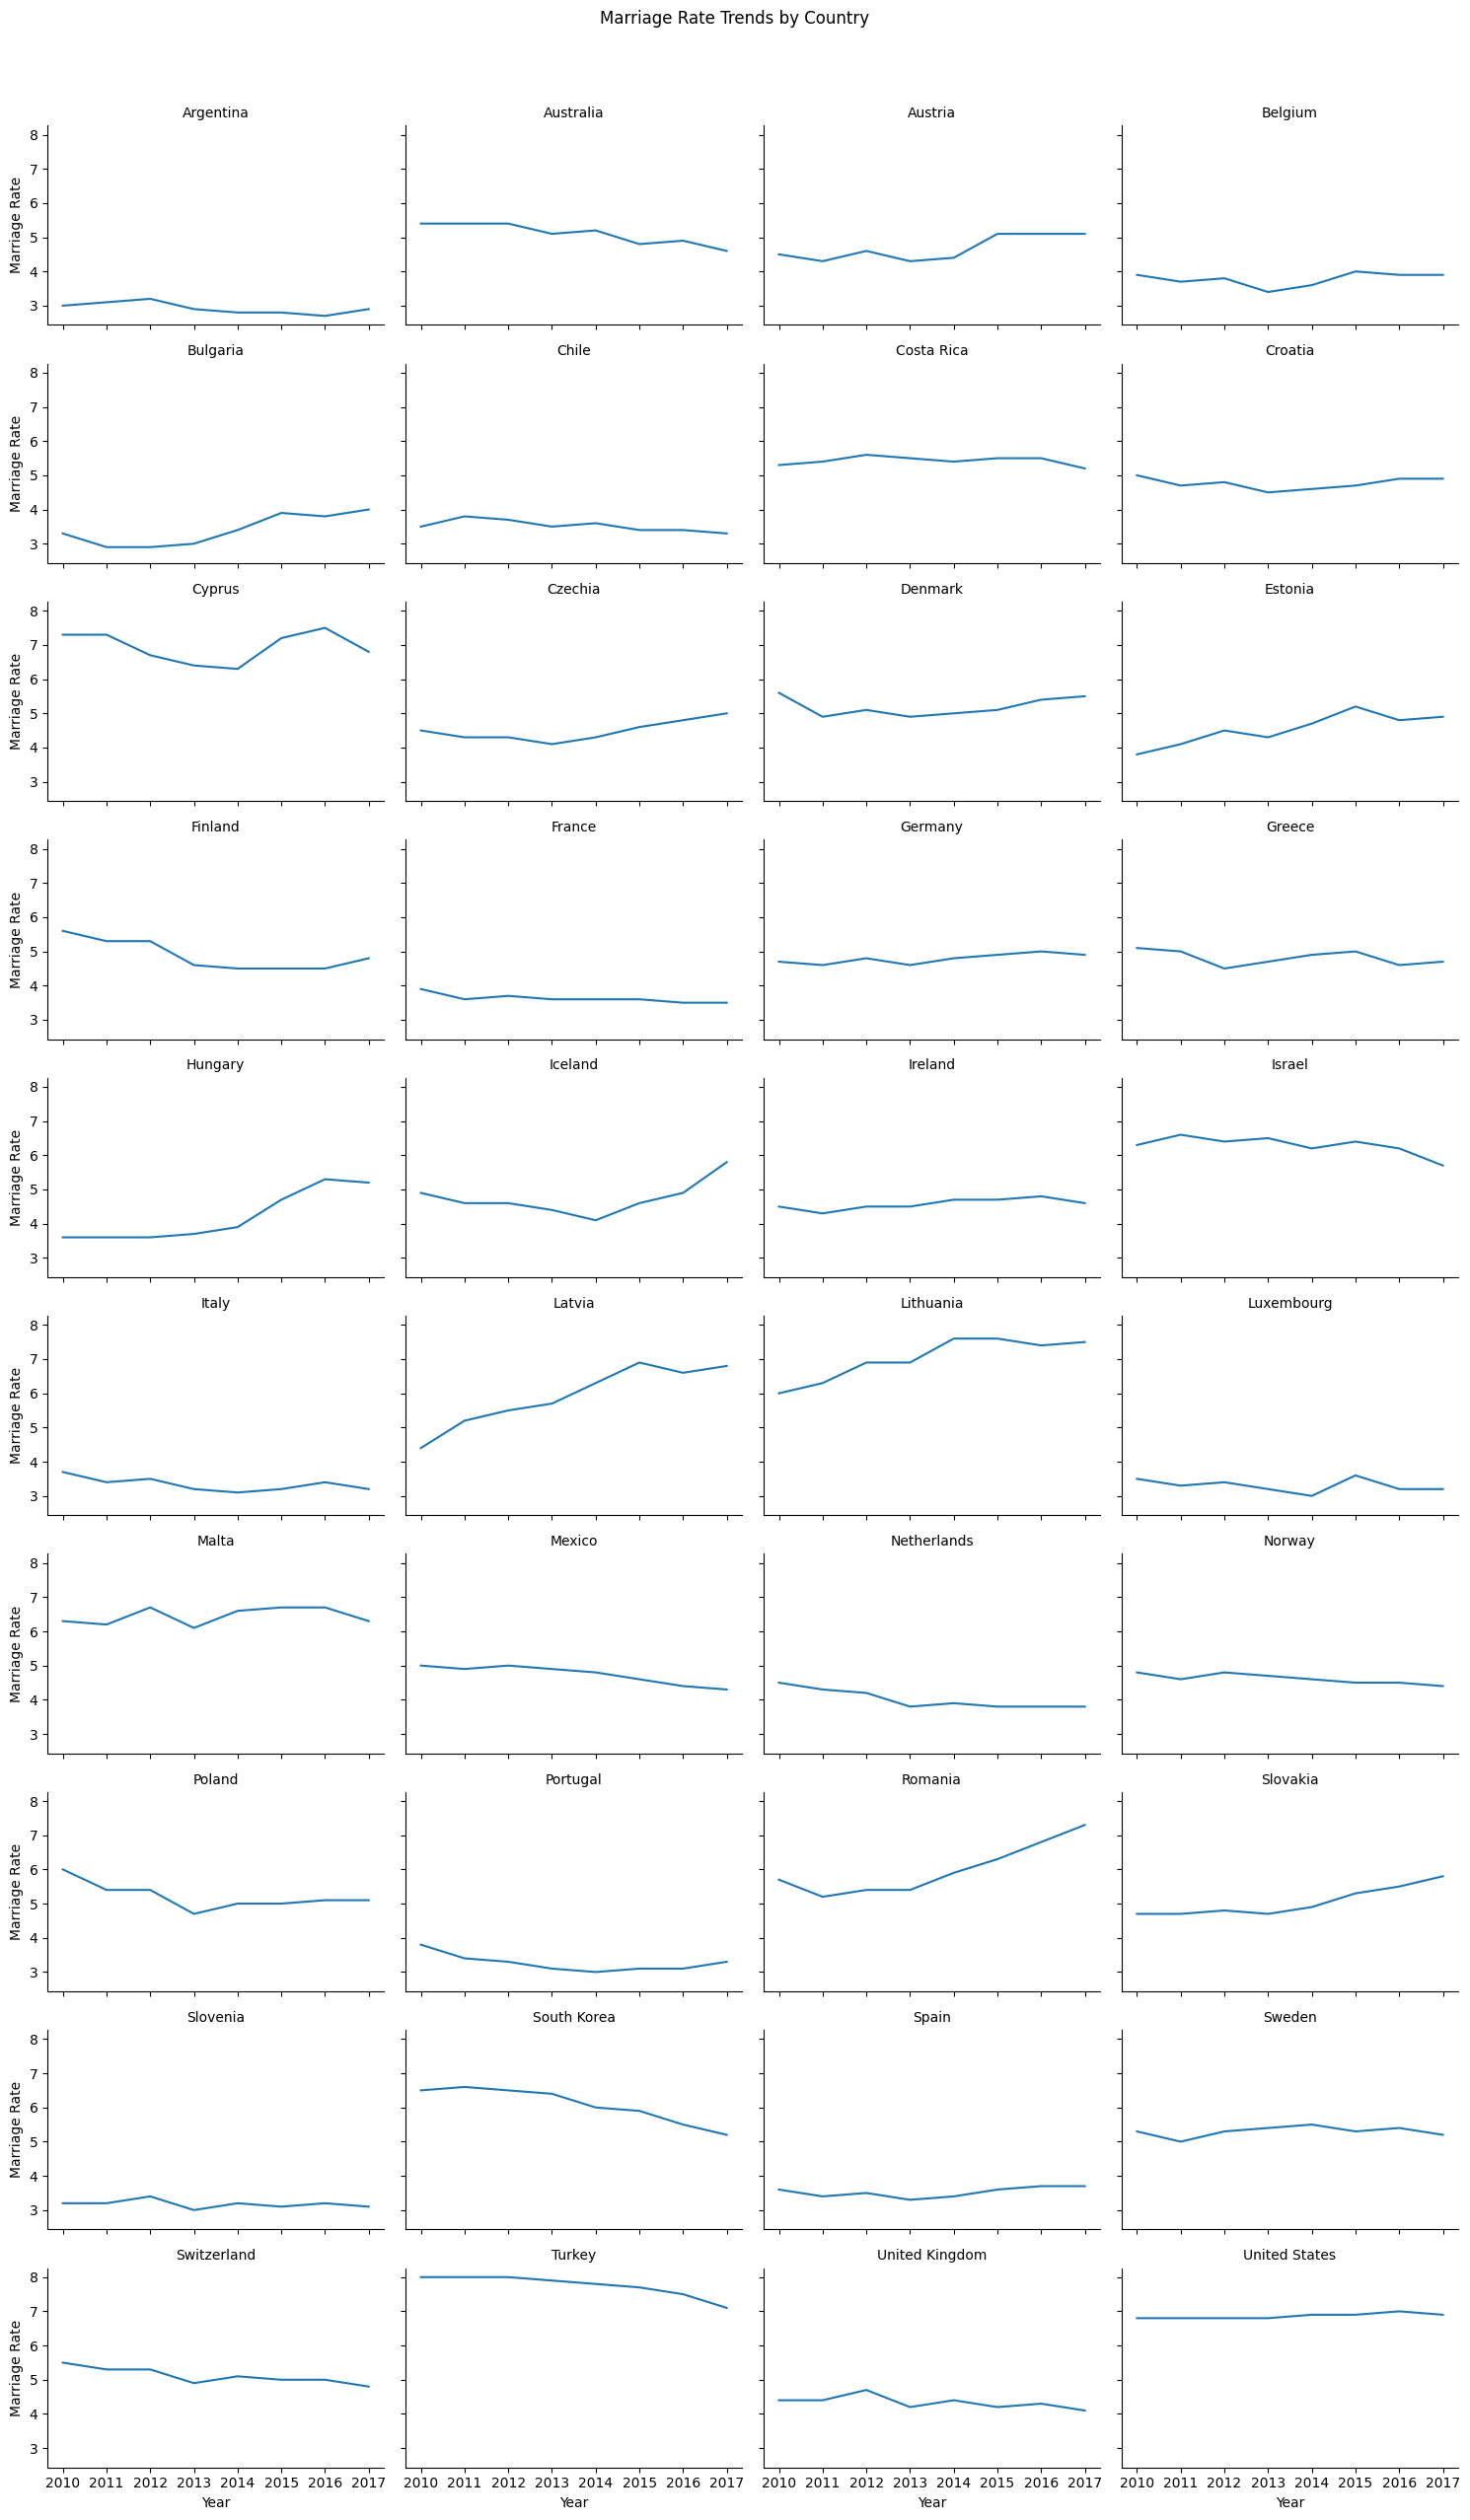

In [ ]:
g = sns.FacetGrid(df, col="Entity", col_wrap=4, height=2.5, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Year", y="Crude marriage rate (marriages per 1,000 people)")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Marriage Rate")
g.fig.suptitle("Marriage Rate Trends by Country", y=1.02)
plt.tight_layout()
plt.show()

### Creating a bar plot for average marriage rate and urbanization by country

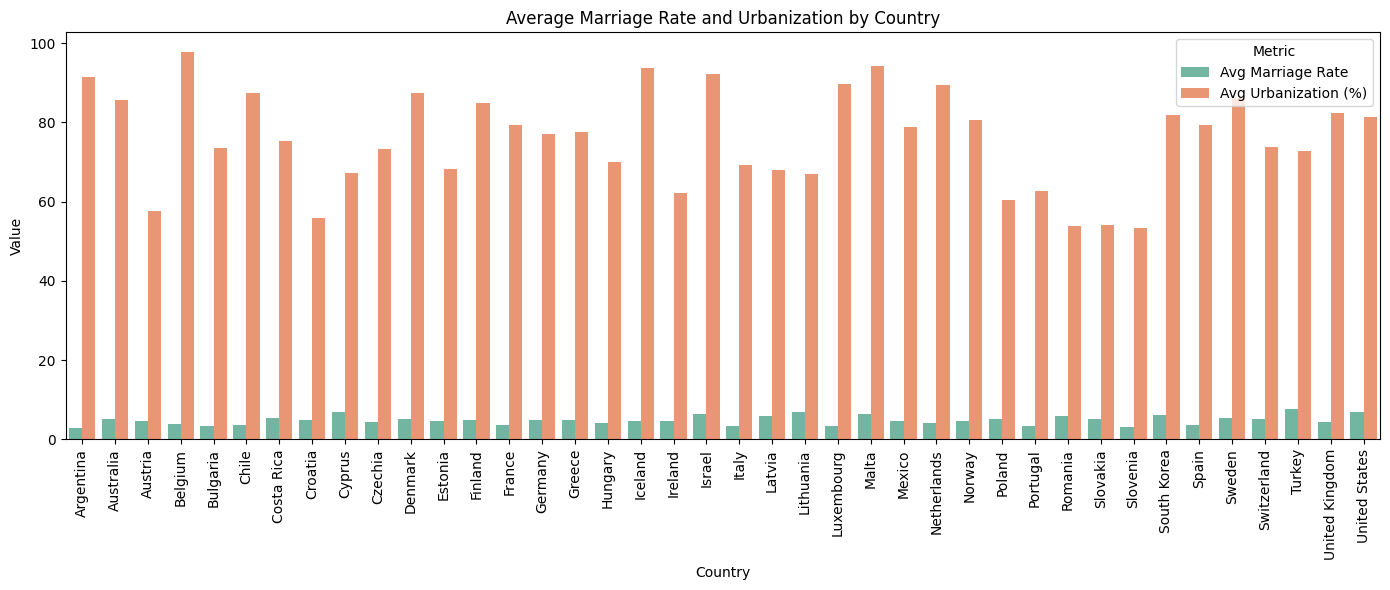

In [ ]:
avg_df = df.groupby("Entity")[[
    "Crude marriage rate (marriages per 1,000 people)",
    "Urban population (% of total population)"
]].mean(numeric_only=True).reset_index()

avg_df = avg_df.rename(columns={
    "Entity": "Country",
    "Crude marriage rate (marriages per 1,000 people)": "Avg Marriage Rate",
    "Urban population (% of total population)": "Avg Urbanization (%)"
})

melted = avg_df.melt(id_vars="Country",
                     var_name="Metric",
                     value_name="Value")

plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x="Country", y="Value", hue="Metric", palette="Set2")
plt.xticks(rotation=90)
plt.title("Average Marriage Rate and Urbanization by Country")
plt.xlabel("Country")
plt.ylabel("Value")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

### Creating a scatterplot of urbanization vs marriage rate by country with regression line

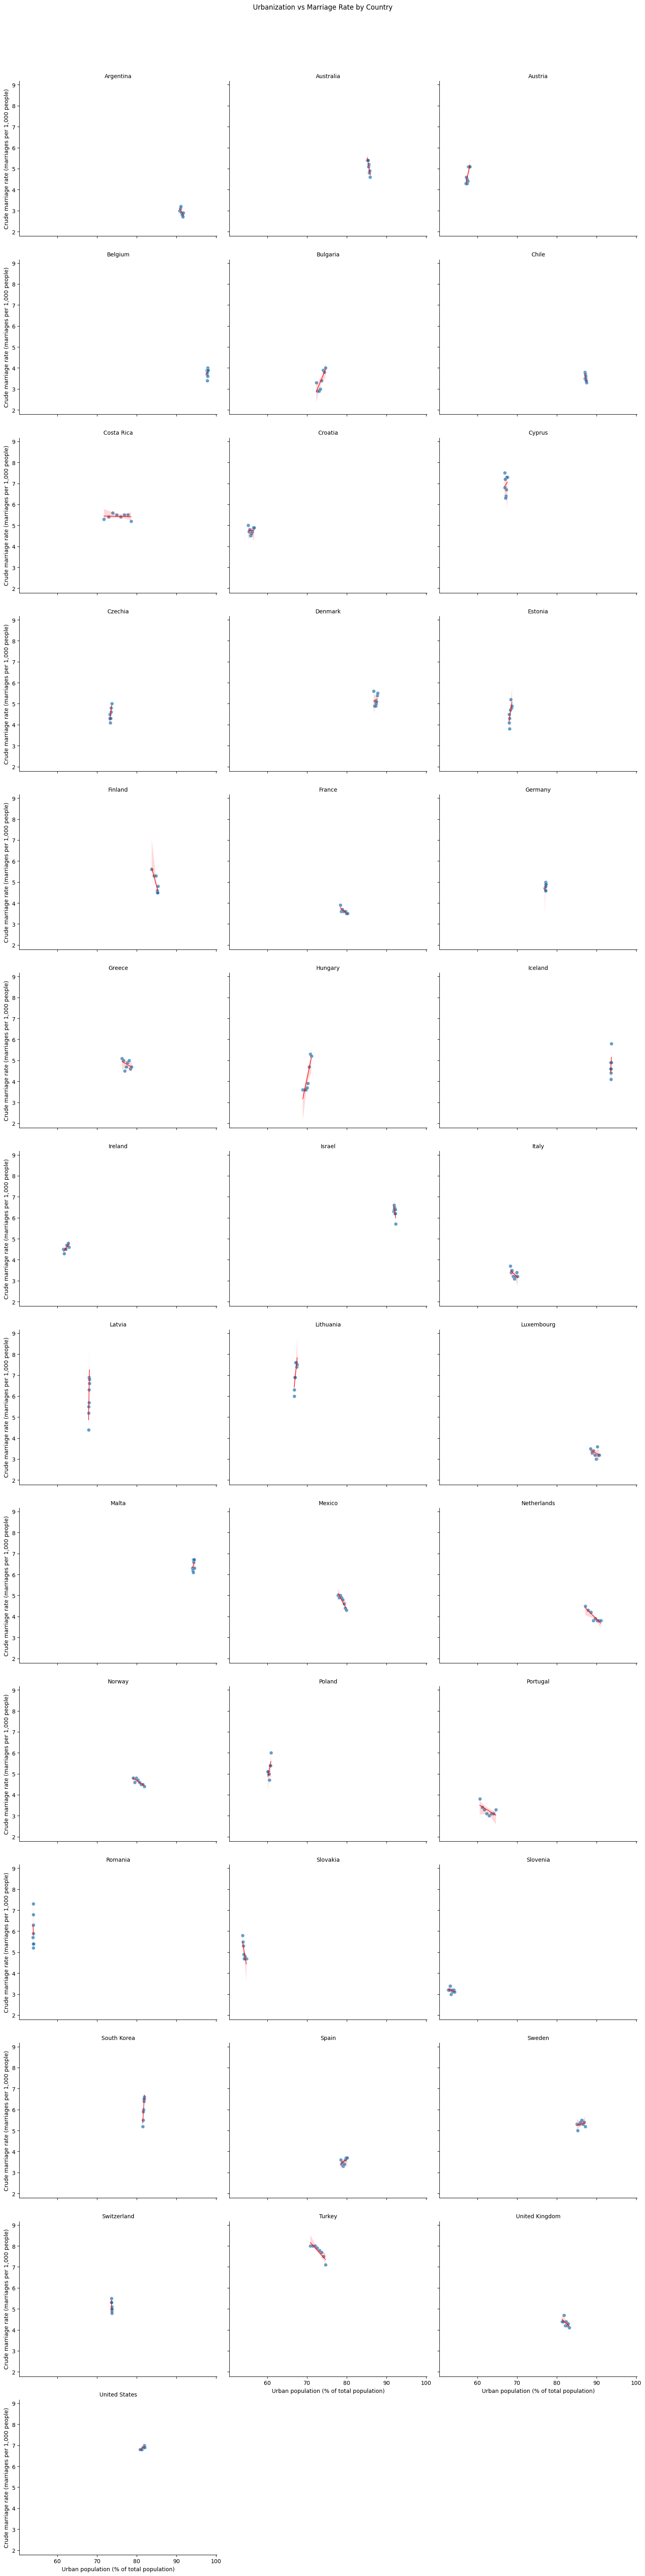

In [ ]:
g = sns.FacetGrid(
    df,
    col="Entity",
    col_wrap=3,
    height=4.5,
    aspect=1.2
)

g.map_dataframe(
    sns.scatterplot,
    x="Urban population (% of total population)",
    y="Crude marriage rate (marriages per 1,000 people)",
    alpha=0.7,
    s=40
)
g.map_dataframe(
    sns.regplot,
    x="Urban population (% of total population)",
    y="Crude marriage rate (marriages per 1,000 people)",
    scatter=False,
    color='red',
    line_kws={"linewidth": 1},
    truncate=True
)

g.set_titles("{col_name}")
g.fig.suptitle("Urbanization vs Marriage Rate by Country", y=1.02)
plt.tight_layout()
plt.show()

### Creating a scatterplot showing urbanization vs marriage rate generally

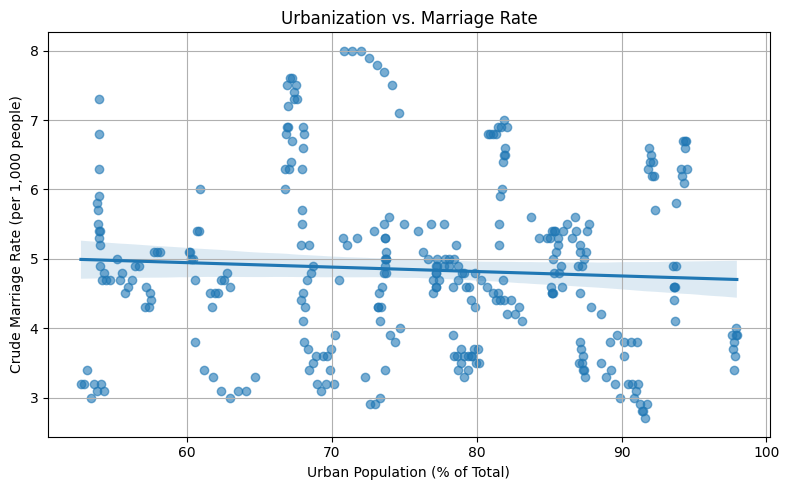

In [ ]:
urban = df['Urban population (% of total population)']
marriage = df['Crude marriage rate (marriages per 1,000 people)']

plt.figure(figsize=(8, 5))
sns.regplot(x=urban, y=marriage, scatter_kws={"alpha": 0.6})
plt.title("Urbanization vs. Marriage Rate")
plt.xlabel("Urban Population (% of Total)")
plt.ylabel("Crude Marriage Rate (per 1,000 people)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Creating a scatterplot showing urbanization vs marriage rate generally different colors indicating different countries

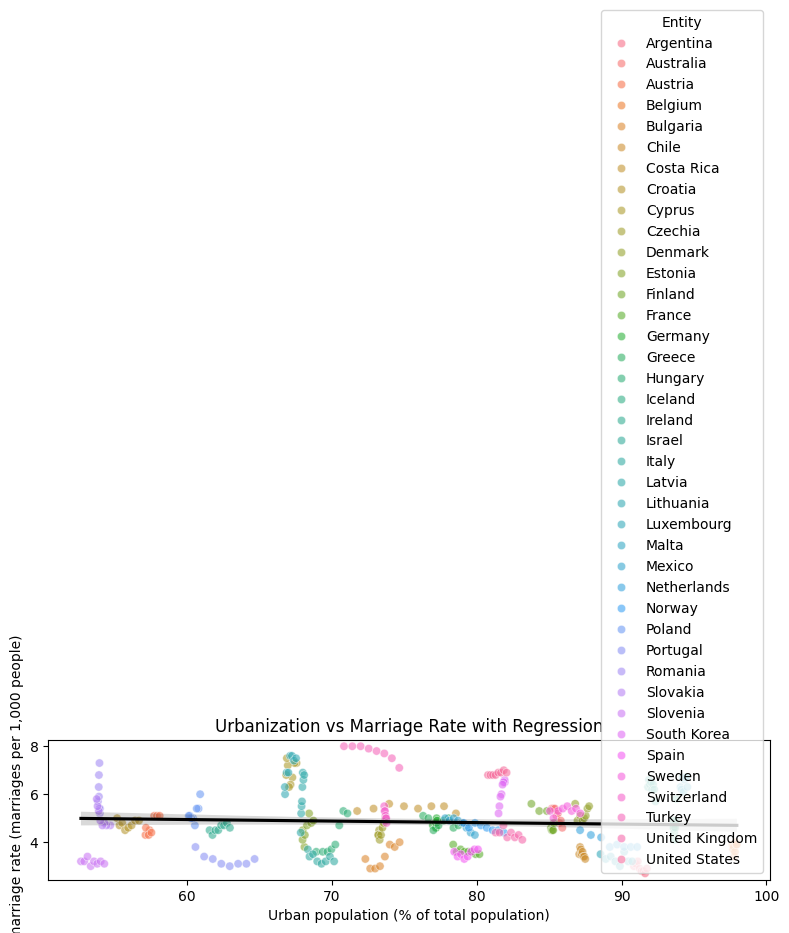

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Urban population (% of total population)",
    y="Crude marriage rate (marriages per 1,000 people)",
    hue="Entity",
    alpha=0.6
)
sns.regplot(
    data=df,
    x="Urban population (% of total population)",
    y="Crude marriage rate (marriages per 1,000 people)",
    scatter=False,
    color="black"
)
plt.title("Urbanization vs Marriage Rate with Regression")
plt.tight_layout()
plt.show()

### Creating a heatmap of all the factors

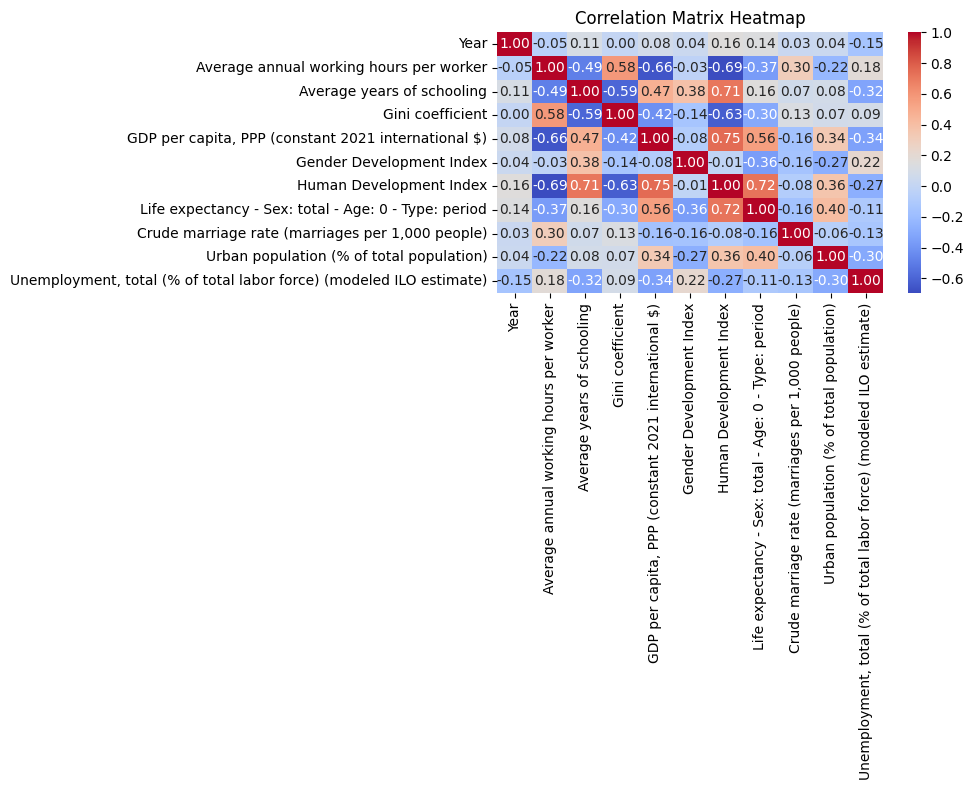

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

### Creating violin graphs of the average of other possible factors and the average of marriage rates

<ipython-input-31-30ddaf436dc1>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-31-30ddaf436dc1>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-31-30ddaf436dc1>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-31-30ddaf436dc1>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-31-30ddaf436dc1>:35: FutureWarning: 


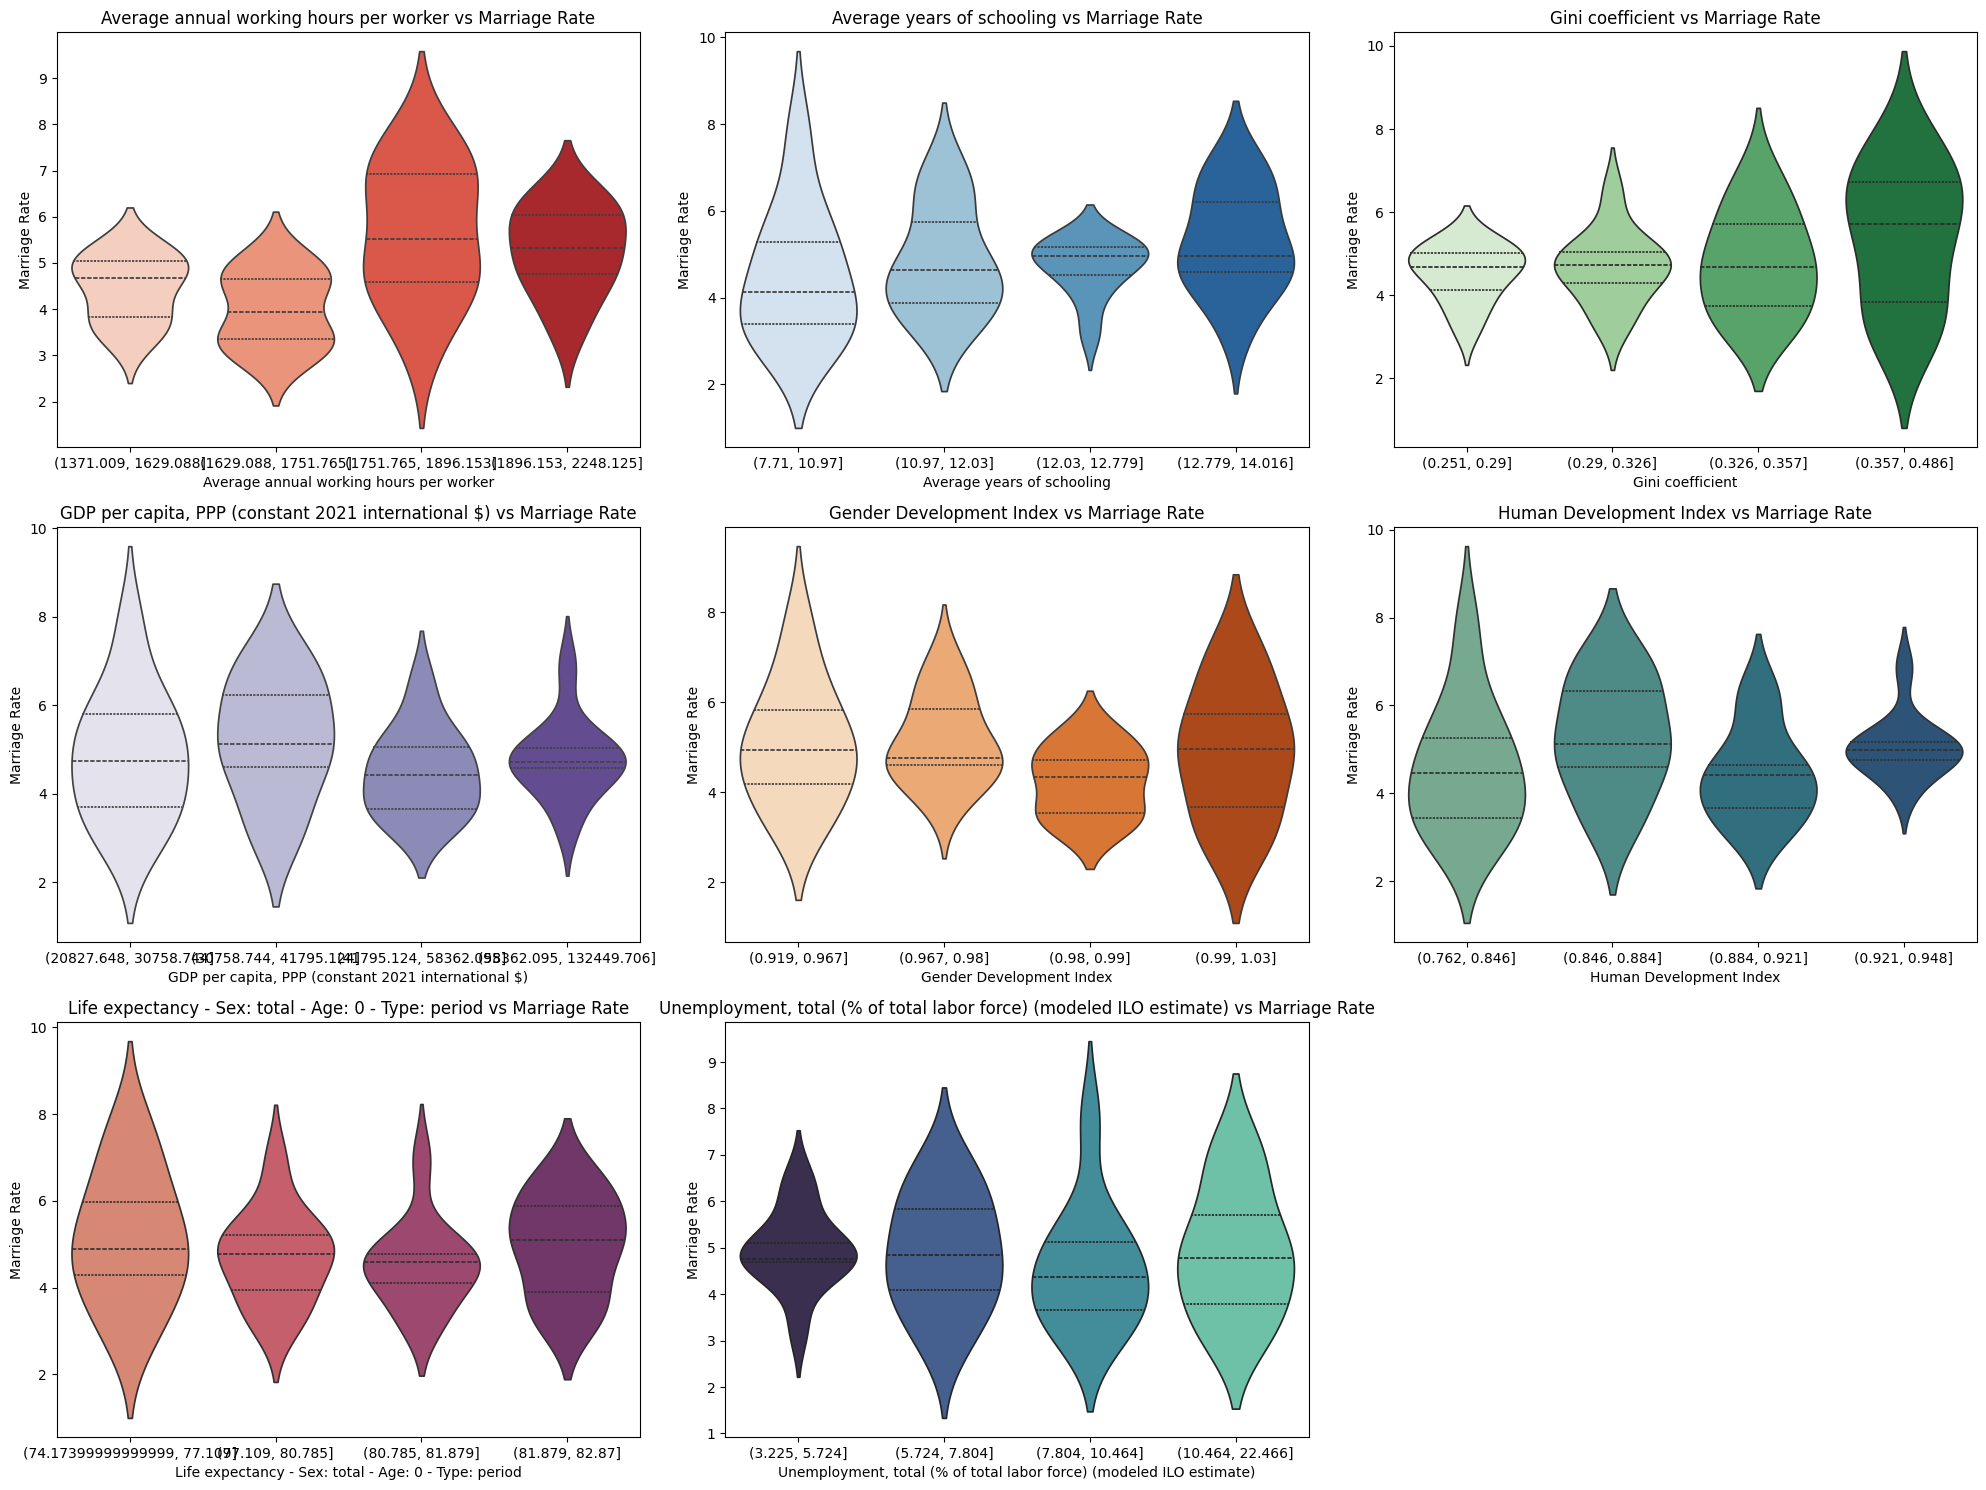

In [ ]:
#Start of help from LLM
grouped_df = df.groupby("Entity").mean(numeric_only=True).reset_index()

variables = [
    ("Average annual working hours per worker", "Reds"),
    ("Average years of schooling", "Blues"),
    ("Gini coefficient", "Greens"),
    ("GDP per capita, PPP (constant 2021 international $)", "Purples"),
    ("Gender Development Index", "Oranges"),
    ("Human Development Index", "crest"),
    ("Life expectancy - Sex: total - Age: 0 - Type: period", "flare"),
    ("Unemployment, total (% of total labor force) (modeled ILO estimate)", "mako")
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, (var, palette) in enumerate(variables):
    grouped_df[f"{var}_binned"] = pd.qcut(grouped_df[var], q=4, duplicates='drop')

    sns.violinplot(
        x=f"{var}_binned",
        y="Crude marriage rate (marriages per 1,000 people)",
        data=grouped_df,
        inner="quartile",
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f"{var} vs Marriage Rate")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Marriage Rate")

if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
#End of help from LLM

## Hypothesis Testing

### Importing needed libraries for hypothesis testing

In [18]:
from scipy import stats
import statsmodels.api as sm
from scipy.stats import spearmanr

Hypothesis: Countries with higher levels of urbanization tend to have lower marriage rates

**Null Hypothesis (H₀):** There is no correlation between urbanization and marriage rates

**Alternative Hypothesis (H₁):** There is a negative correlation between urbanization and marriage rates

Looking at the scatterplot showing urbanization vs marriage rate generally we can see that there is no linear relationship between the two. So I decided to use the Spearman test because the variables are not normally distributed.

In [19]:

corr, p_val = spearmanr(
    df['Urban population (% of total population)'],
    df['Crude marriage rate (marriages per 1,000 people)']
)

print("Spearman correlation coefficient:", corr)
print("p-value:", p_val)

Spearman correlation coefficient: -0.07263001913544335
p-value: 0.1950192387784112


The spearman coefficient is very close to 0 so the correlation is very weak.

Also the p-value is greater than 0.05, the result is not statistically significant.

**Failed to reject the null hypothesis**

Based on the Spearman test, there is no significant relationship between urbanization and marriage rates in the dataset. The correlation is very weak.

--------------

Hypothesis: Marriage rates decrease as Human Development Index (HDI) increases

**Null Hypothesis (H₀):** There is no correlation between HDI and marriage rates

**Alternative Hypothesis (H₁):** There is a negative correlation between HDI and marriage rates

In [20]:
corr, p_val = spearmanr(
    df['Crude marriage rate (marriages per 1,000 people)'],
    df['Human Development Index']
)

print("Spearman correlation coefficient:", corr)
print("p-value:", p_val)

Spearman correlation coefficient: -0.02185635627609343
p-value: 0.6969100762200551


The spearman coefficient is very close to 0 so the correlation is very weak.

Also the p-value is greater than 0.05, the result is not statistically significant.

**Failed to reject the null hypothesis**

Based on the Spearman test, there is no significant relationship between HDI and marriage rates in the dataset.

--------------

Hypothesis: Marriage rates decrease as unemployments rates increases

**Null Hypothesis (H₀):** There is no correlation between unemployment rates and marriage rates

**Alternative Hypothesis (H₁):** There is a negative correlation between unemployment rates and marriage rates

In [21]:
corr, p_val = spearmanr(
    df['Crude marriage rate (marriages per 1,000 people)'],
    df['Unemployment, total (% of total labor force) (modeled ILO estimate)']
)

print("Spearman correlation coefficient:", corr)
print("p-value:", p_val)

Spearman correlation coefficient: -0.16321507351697456
p-value: 0.0034124598178973983


The p-value is less than 0.05, the result is significant.

**We can reject the null hypothesis**

Based on the Spearman test, there is a significant relationship between unemployments rates and marriage rates in the dataset even though it is weak.

## Machine Learning

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Drop the columns Entity, Year because they are not variables. Also drop the outcome from the predictor.

In [51]:
df = df.drop(columns=['Entity', 'Year'])

outcome = 'Crude marriage rate (marriages per 1,000 people)'
predictor = df.columns.drop([outcome])

In [15]:
X = df[predictor]
y = df[outcome]

# Split the data into training and testing sets as seen in the notebooks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Because the outcome is continuous it is a regression problem and we cannot to classification.

###Linear Regression

In [17]:
clf_linreg = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores_linreg_cv = np.sqrt(-cross_val_score(clf_linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_linreg_cv = cross_val_score(clf_linreg, X, y, cv=kf, scoring='r2')

model training and predictions

In [18]:
clf_linreg.fit(X_train, y_train)
predictions_linreg = clf_linreg.predict(X_test)

In [19]:
rmse_linreg_test = np.sqrt(mean_squared_error(y_test, predictions_linreg))
r2_linreg_test = r2_score(y_test, predictions_linreg)

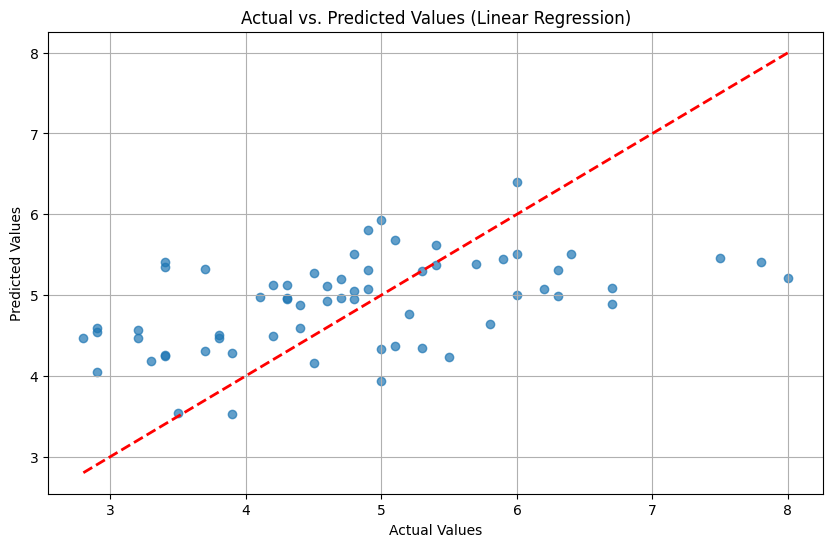

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_linreg, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.grid(True)
plt.show()

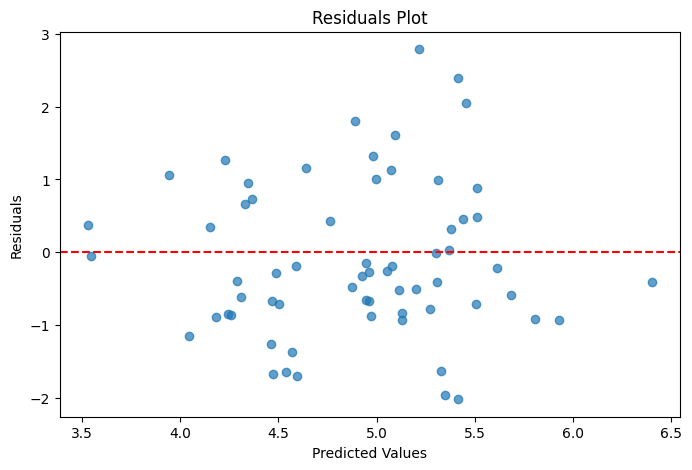

In [23]:
residuals_linreg = y_test - predictions_linreg
plt.figure(figsize=(8, 5))
plt.scatter(predictions_linreg, residuals_linreg, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

### K-Nearest Neighbors Regressor

In [24]:
knn = KNeighborsRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores_knn_cv = np.sqrt(-cross_val_score(knn, X, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_knn_cv = cross_val_score(knn, X, y, cv=kf, scoring='r2')

In [25]:
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [26]:
rmse_knn_test = np.sqrt(mean_squared_error(y_test, predictions_knn))
r2_knn_test = r2_score(y_test, predictions_knn)

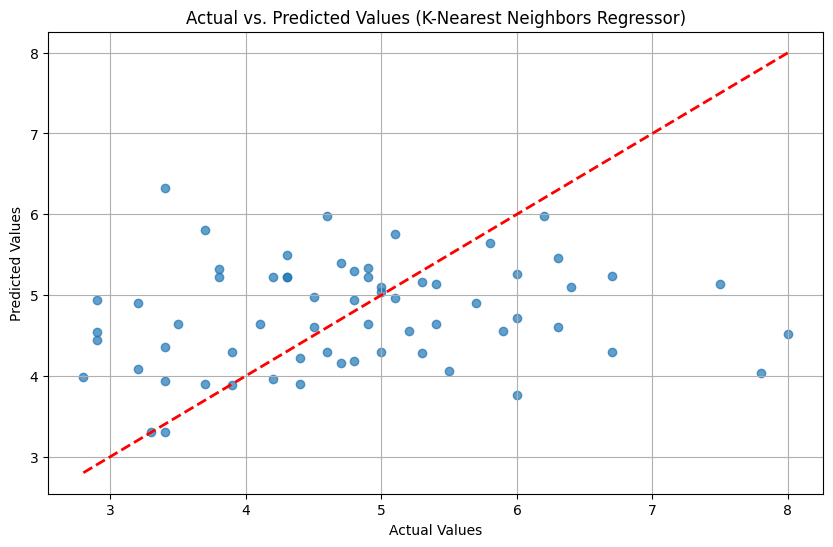

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_knn, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (K-Nearest Neighbors Regressor)")
plt.grid(True)
plt.show()

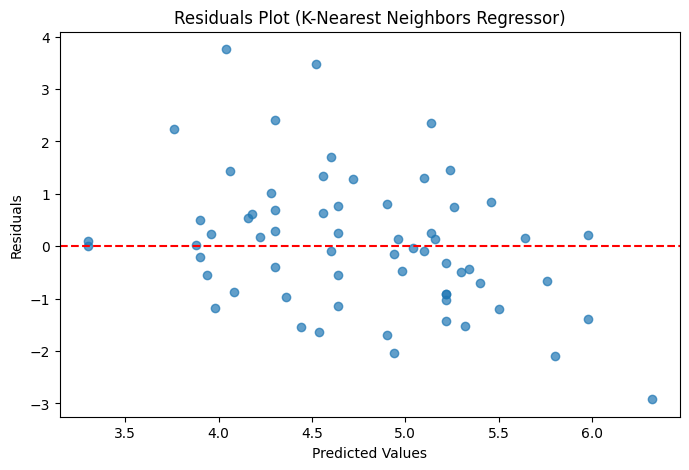

In [28]:
residuals_knn = y_test - predictions_knn
plt.figure(figsize=(8, 5))
plt.scatter(predictions_knn, residuals_knn, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (K-Nearest Neighbors Regressor)")
plt.show()

### Decision Tree Regressor

In [29]:
dtree = DecisionTreeRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores_dtree_cv = np.sqrt(-cross_val_score(dtree, X, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_dtree_cv = cross_val_score(dtree, X, y, cv=kf, scoring='r2')


In [30]:
dtree.fit(X_train, y_train)
predictions_dtree = dtree.predict(X_test)

In [31]:
rmse_dtree_test = np.sqrt(mean_squared_error(y_test, predictions_dtree))
r2_dtree_test = r2_score(y_test, predictions_dtree)

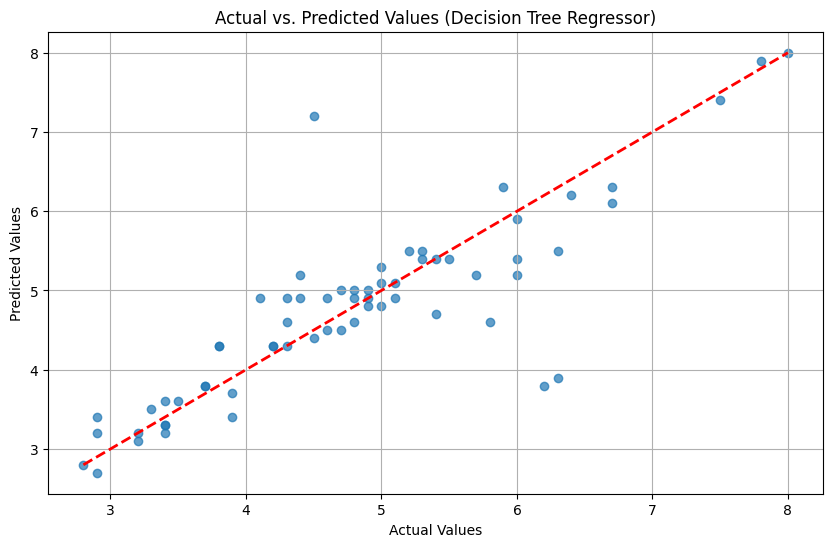

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_dtree, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree Regressor)")
plt.grid(True)
plt.show()

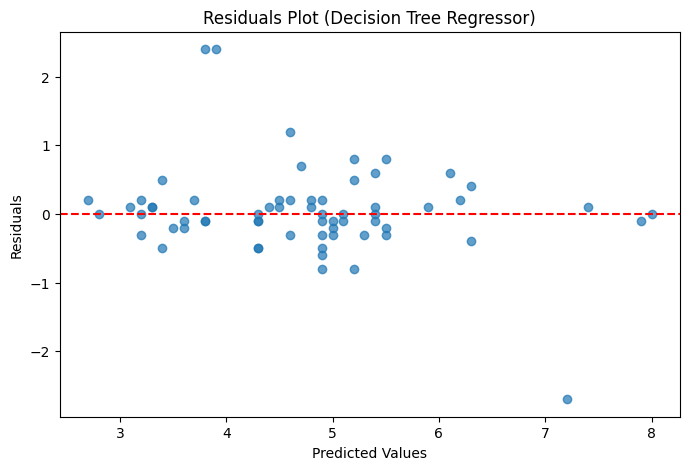

In [33]:
residuals_dtree = y_test - predictions_dtree
plt.figure(figsize=(8, 5))
plt.scatter(predictions_dtree, residuals_dtree, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Decision Tree Regressor)")
plt.show()

### Random Forrest Regressor

In [34]:
rforest = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores_rforest_cv = np.sqrt(-cross_val_score(rforest, X, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_rforest_cv = cross_val_score(rforest, X, y, cv=kf, scoring='r2')

In [35]:
rforest.fit(X_train, y_train)
predictions_rforest = rforest.predict(X_test)

In [36]:
rmse_rforest_test = np.sqrt(mean_squared_error(y_test, predictions_rforest))
r2_rforest_test = r2_score(y_test, predictions_rforest)

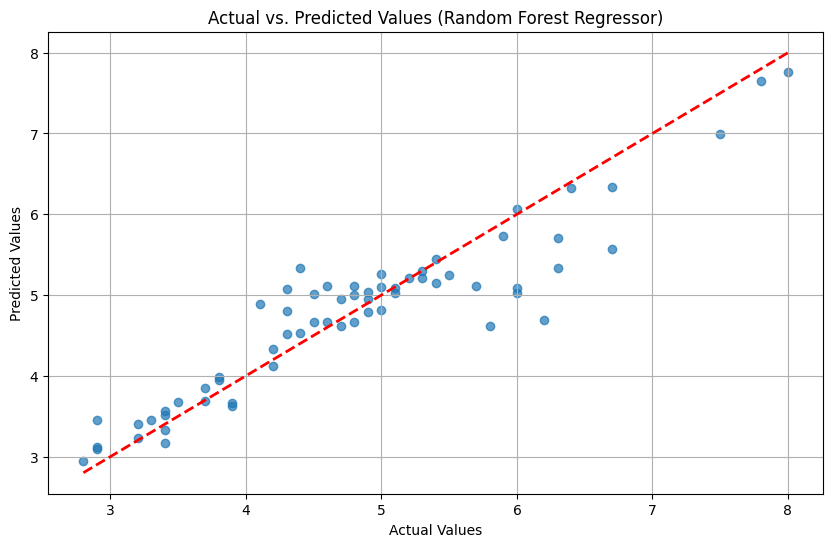

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_rforest, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Random Forest Regressor)")
plt.grid(True)
plt.show()

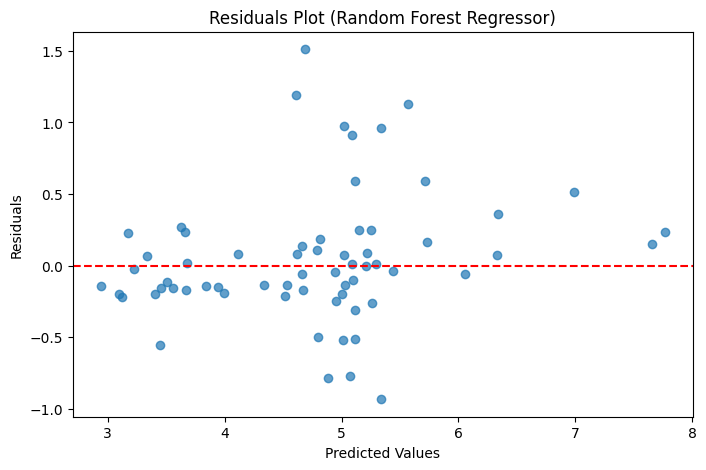

In [38]:
residuals_rforest = y_test - predictions_rforest
plt.figure(figsize=(8, 5))
plt.scatter(predictions_rforest, residuals_rforest, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Random Forest Regressor)")
plt.show()

### Comparison of the Models

In [41]:
# Start of help from LLM
# Compile RMSE scores from the test set for comparison
rmse_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Test RMSE': [rmse_linreg_test, rmse_knn_test, rmse_dtree_test, rmse_rforest_test]
})

# Compile R2 scores from the test set for comparison
r2_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Test R2 Score': [r2_linreg_test, r2_knn_test, r2_dtree_test, r2_rforest_test]
})

print("Test Set RMSE Comparison:")
print(rmse_comparison)
print("\nTest Set R2 Score Comparison:")
print(r2_comparison)
# End of help from LLM

Test Set RMSE Comparison:
                 Model  Test RMSE
0    Linear Regression   1.056157
1  K-Nearest Neighbors   1.268353
2        Decision Tree   0.654432
3        Random Forest   0.453956

Test Set R2 Score Comparison:
                 Model  Test R2 Score
0    Linear Regression       0.229336
1  K-Nearest Neighbors      -0.111445
2        Decision Tree       0.704106
3        Random Forest       0.857624


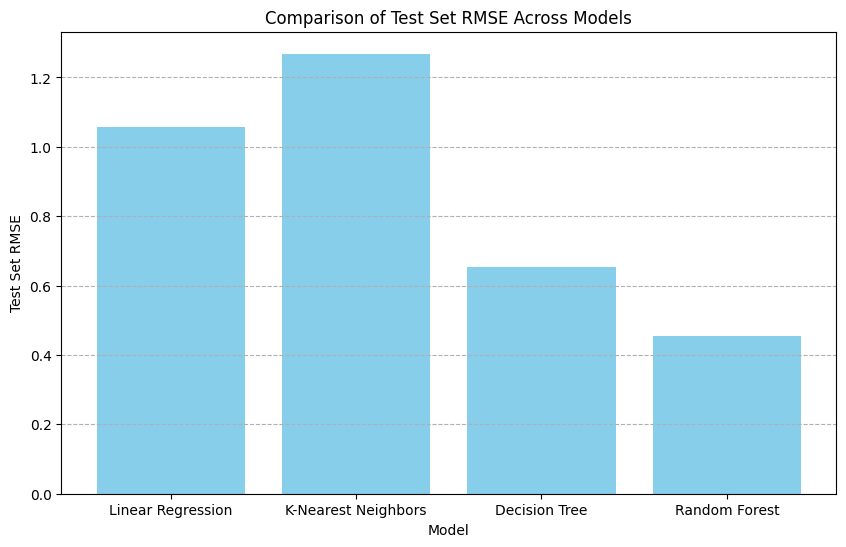

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(rmse_comparison['Model'], rmse_comparison['Test RMSE'], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Test Set RMSE")
plt.title("Comparison of Test Set RMSE Across Models")
plt.grid(axis='y', linestyle='--')
plt.show()

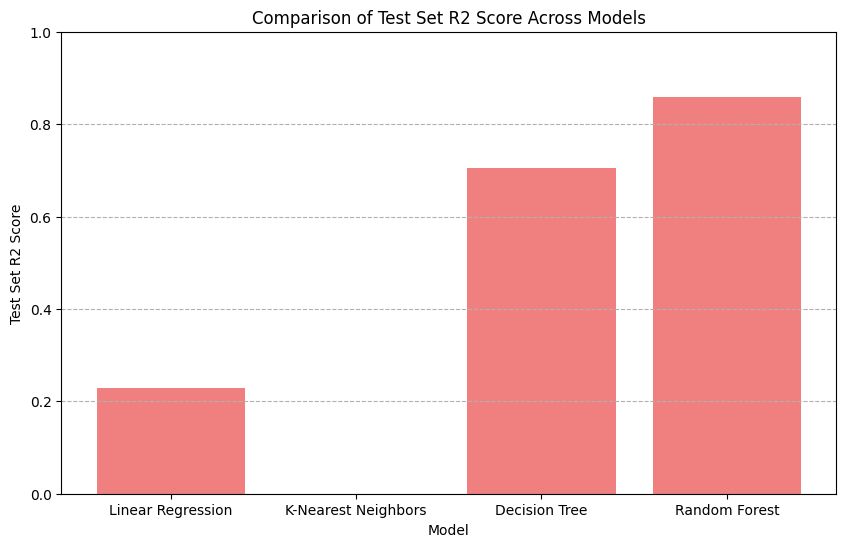

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(r2_comparison['Model'], r2_comparison['Test R2 Score'], color='lightcoral')
plt.xlabel("Model")
plt.ylabel("Test Set R2 Score")
plt.title("Comparison of Test Set R2 Score Across Models")
plt.grid(axis='y', linestyle='--')
plt.ylim(0, 1)
plt.show()

The best performing model should have the highest R2 score and the lowest RMSE score. Which makes **Random Forest Regressor** the best performing model amongst these four models.

# Conclusion

This project set out to explore the potential influence of urbanization on global marriage trends, with a particular focus on whether higher urbanization levels correlate with lower marriage rates. The study involved compiling and cleaning a rich set of global datasets covering a variety of socio-economic indicators from 2010 to 2017. These included marriage rates, urbanization percentages, GDP per capita, unemployment rates, the Human and Gender Development Indices, average schooling years, life expectancy, income inequality (Gini index), and working hours. Despite facing limitations such as missing data and the need for imputation, the datasets were merged into a unified form to facilitate statistical analysis and visualization.

The hypothesis that higher urbanization correlates with lower marriage rates was tested but found to lack statistical significance. Similarly, other expected relationships such as those between marriage rates and Human Development Index did not show strong evidence. Interestingly, unemployment rate emerged as the only variable with a significant correlation, suggesting that economic stability may play a more direct role in marriage decisions than urban living itself.

Machine learning modeling using a Random Forest Regressor provided some predictive capability but was limited by data sparsity and complexity of the phenomenon being modeled.

Overall, while urbanization alone does not appear to significantly affect marriage rates on a global scale, the findings highlight the importance of economic conditions and suggest that cultural and psychological factors could also play substantial roles. Future research could benefit from broader and more recent datasets, as well as the inclusion of cultural indicators to capture the full picture of marriage dynamics in the modern world.